In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
plt.style.use("seaborn")

In [2]:
file = r"C:\Users\USER\Python Programme\uni\fe_assignment\spot_future.xlsx"
df = pd.read_excel(file, sheet_name='deviation and cost', index_col=0)
df

,Spot,Future,Risk Free,Cost of Carry,Deviation,Roll's Spread,Volatility($)
Dates,,,,,,,
2001-01-25,264.95,264.8,5.29,268.477236,3.677236,1.131,0.000061
2001-01-26,263.05,262.9,5.29,266.551942,3.651942,2.432,0.000060
2001-01-29,263.15,262.8,5.32,266.673273,3.873273,2.404,0.000060
2001-01-30,265.85,268.0,5.24,269.355546,1.355546,0.605,0.000061
2001-01-31,265.85,268.0,5.19,269.321879,1.321879,3.397,0.000061
...,...,...,...,...,...,...,...
2022-12-23,1797.91,1804.2,3.75,1814.844663,10.644663,23.868,0.000111
2022-12-27,1813.93,1823.1,3.84,1831.427582,8.327582,15.227,0.000105
2022-12-28,1804.09,1815.8,3.88,1821.674822,5.874822,21.068,0.000106


In [3]:
df = df.iloc[:, :7]

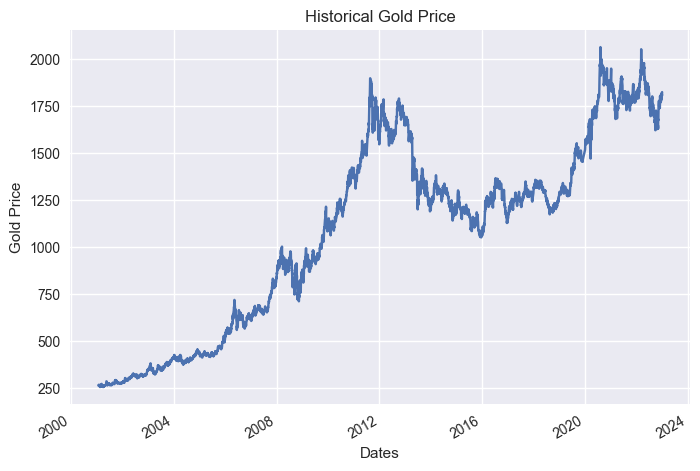

In [3]:
df['Spot'].plot(ylabel="Gold Price", title="Historical Gold Price");

### Price Drop Period

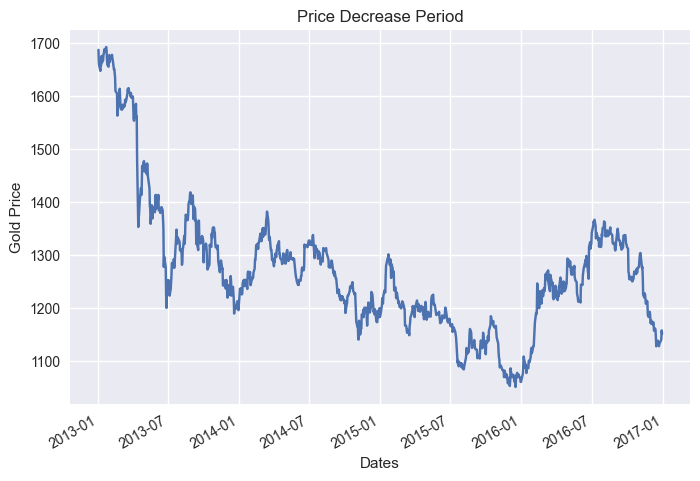

In [4]:
# .to_clipboard(excel=True)
df.loc["2008" : "2008-10", "Spot"].plot(ylabel="Gold Price", title="Price Decrease Period");
drop = df.loc["2008" : "2008-10", ["Deviation", "Roll's Spread"]]
drop.to_clipboard(excel=True)
nw_drop = drop[drop['Roll\'s Spread'] /  drop['Deviation'] < 1.5]
drop[drop['Roll\'s Spread'] /  drop['Deviation'] < 1.5].to_clipboard(excel=True)

### Price Increase Period

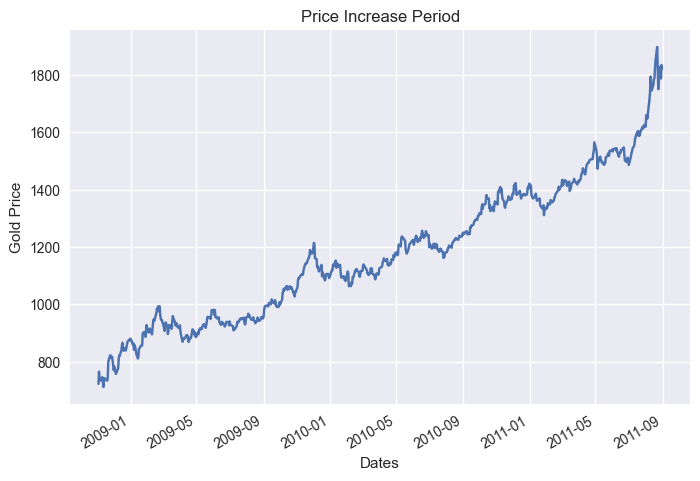

In [15]:
df.loc['2008-11': "2011-08", "Spot"].plot(ylabel="Gold Price", title="Price Increase Period");
rise = df.loc['2008-11': "2011-08", ["Deviation", "Roll's Spread"]]
rise.to_clipboard(excel=True)
nw_rise = rise[rise['Roll\'s Spread'] /  rise['Deviation'] < 2]
rise[rise['Roll\'s Spread'] /  rise['Deviation'] < 2].to_clipboard(excel=True)

In [27]:
import scipy.stats as stats

### Mann-Whitney test

#### Price Increase

In [58]:
stats.mannwhitneyu(nw_rise['Deviation'], nw_rise['Roll\'s Spread'], alternative="greater")

MannwhitneyuResult(statistic=43272.0, pvalue=4.50295549067601e-08)

#### Price Decrease

In [59]:
stats.mannwhitneyu(nw_drop['Deviation'], nw_drop['Roll\'s Spread'], alternative="greater")

MannwhitneyuResult(statistic=43272.0, pvalue=4.50295549067601e-08)